In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
tickers = ['SPY', 'XLU', 'XLV']

df = yf.download(tickers, start='2015-01-01')
df['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Ticker,SPY,XLU,XLV
Date,,,
2015-01-02,171.568039,33.728050,57.799503
2015-01-05,168.469574,33.315704,57.504734
2015-01-06,166.882797,33.337032,57.311035
2015-01-07,168.962341,33.664074,58.658554
2015-01-08,171.960571,33.898685,59.660748
...,...,...,...
2025-07-15,622.140015,81.989998,132.600006
2025-07-16,624.219971,82.029999,134.250000
2025-07-17,628.039978,82.370003,132.720001


In [3]:
daily_returns = df['Close'].pct_change()

In [4]:
#beta is a way to track how a stock or sector's relationship with the market evolves over time

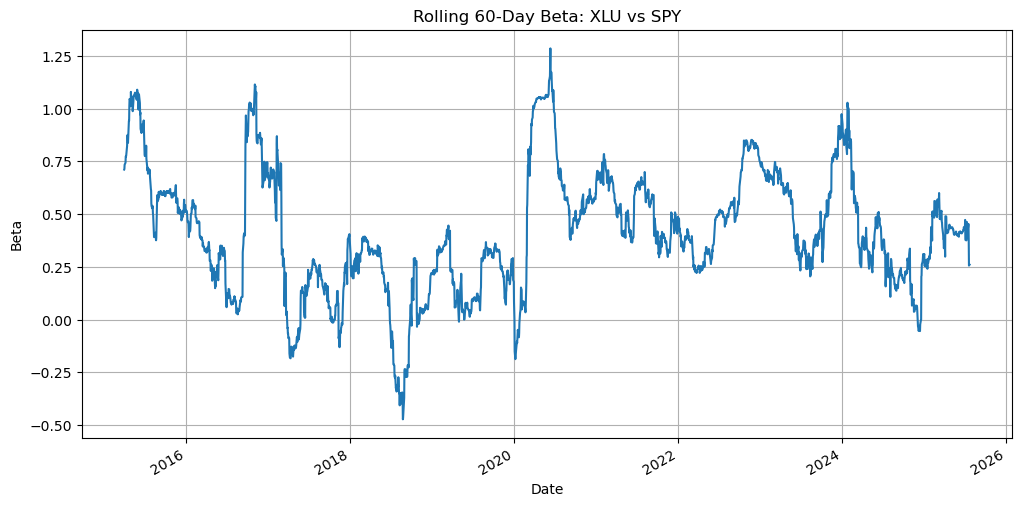

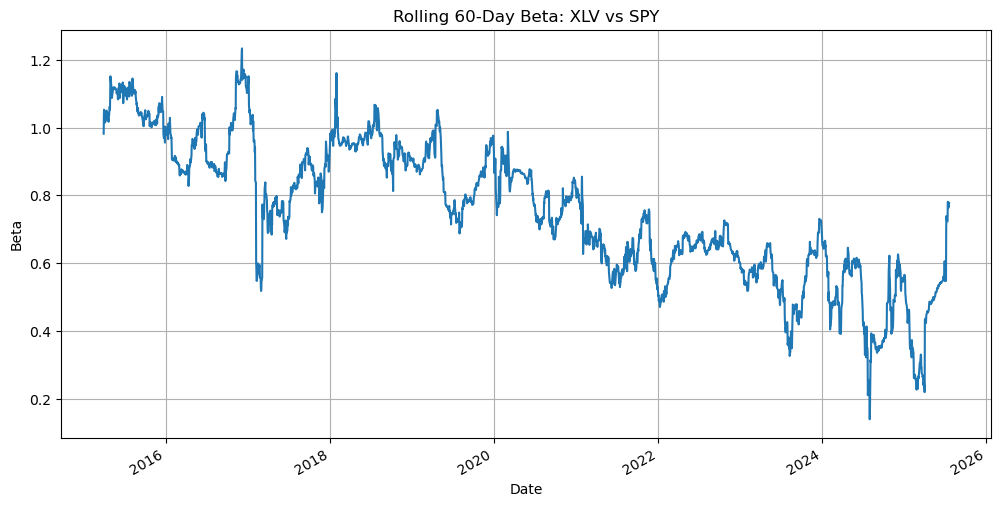

In [5]:
#XLU vs SPY
window = 60

#rolling covariance
rolling_cov = daily_returns['XLU'].rolling(window).cov(daily_returns['SPY'])

#rolling variance
rolling_var = daily_returns['SPY'].rolling(window).var()

#beta = rolling cov / var
rolling_beta = rolling_cov / rolling_var

daily_returns['rolling_beta(XLUvsSPY)'] = rolling_beta

import matplotlib.pyplot as plt

rolling_beta.plot(title='Rolling 60-Day Beta: XLU vs SPY', figsize=(12, 6))
plt.ylabel('Beta')
plt.grid(True)
plt.show()

#XLV vs SPY


#rolling covariance
rolling_cov2 = daily_returns['XLV'].rolling(window).cov(daily_returns['SPY'])

#rolling variance
rolling_var2 = daily_returns['SPY'].rolling(window).var()

#beta = rolling cov / var
rolling_beta2 = rolling_cov2 / rolling_var2

daily_returns['rolling_beta(XLVvsSPY)'] = rolling_beta2

import matplotlib.pyplot as plt

rolling_beta2.plot(title='Rolling 60-Day Beta: XLV vs SPY', figsize=(12, 6))
plt.ylabel('Beta')
plt.grid(True)
plt.show()

daily_returns.dropna(inplace=True)

In [6]:
# beta vs vix

vix = yf.download('^VIX', start='2015-01-01')['Close']
returns = daily_returns.join(vix, how='left')
returns['volatility_period'] = returns['^VIX'].apply(lambda x: 'calm' if x < 15 else 'volatile')
returns['volatility_period'].value_counts()


[*********************100%***********************]  1 of 1 completed


volatility_period
volatile    1597
calm         995
Name: count, dtype: int64

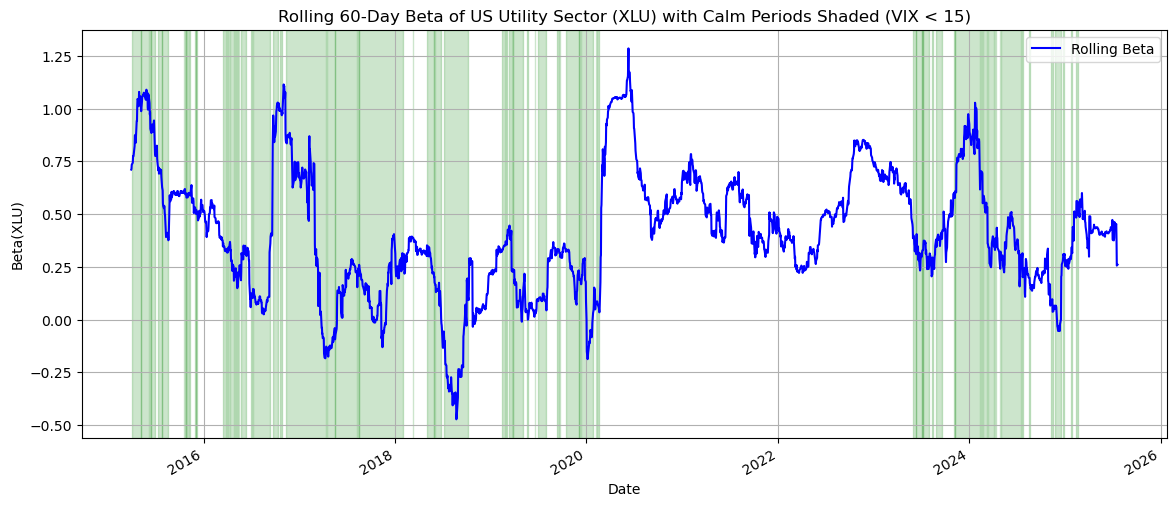

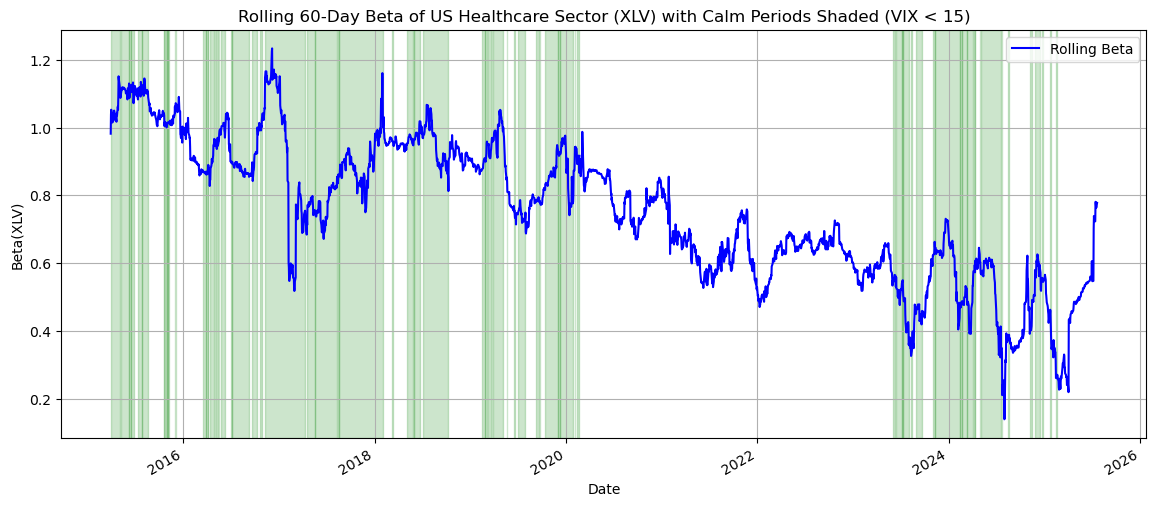

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
rolling_beta.plot(ax=ax, label='Rolling Beta', color='blue')

#calm periods

for i in range(1, len(returns)):
    if returns['volatility_period'].iloc[i] == 'calm' and returns['volatility_period'].iloc[i-1] != 'calm':
        start = returns.index[i]
    if returns['volatility_period'].iloc[i] != 'calm' and returns['volatility_period'].iloc[i-1] == 'calm':
        end = returns.index[i]
        ax.axvspan(start, end, color='green', alpha =0.2)

plt.title('Rolling 60-Day Beta of US Utility Sector (XLU) with Calm Periods Shaded (VIX < 15)')
plt.ylabel('Beta(XLU)')
plt.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
rolling_beta2.plot(ax=ax, label='Rolling Beta', color='blue')

#calm periods

for i in range(1, len(returns)):
    if returns['volatility_period'].iloc[i] == 'calm' and returns['volatility_period'].iloc[i-1] != 'calm':
        start = returns.index[i]
    if returns['volatility_period'].iloc[i] != 'calm' and returns['volatility_period'].iloc[i-1] == 'calm':
        end = returns.index[i]
        ax.axvspan(start, end, color='green', alpha =0.2)

plt.title('Rolling 60-Day Beta of US Healthcare Sector (XLV) with Calm Periods Shaded (VIX < 15)')
plt.ylabel('Beta(XLV)')
plt.legend()
plt.grid(True)
plt.show()

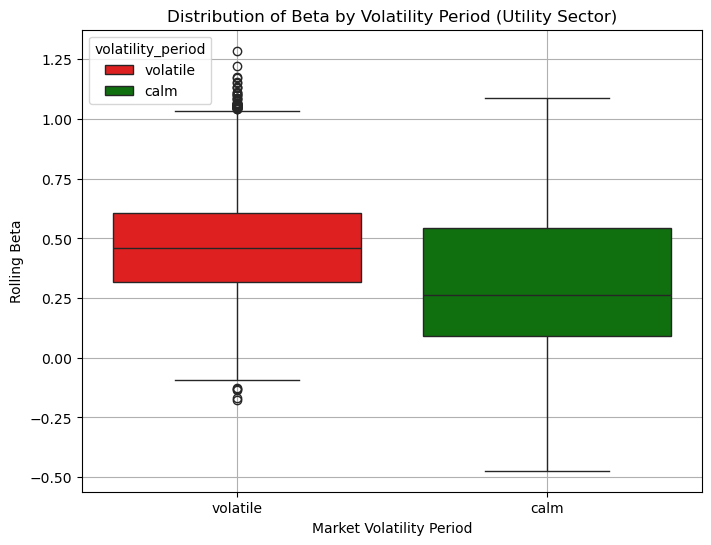

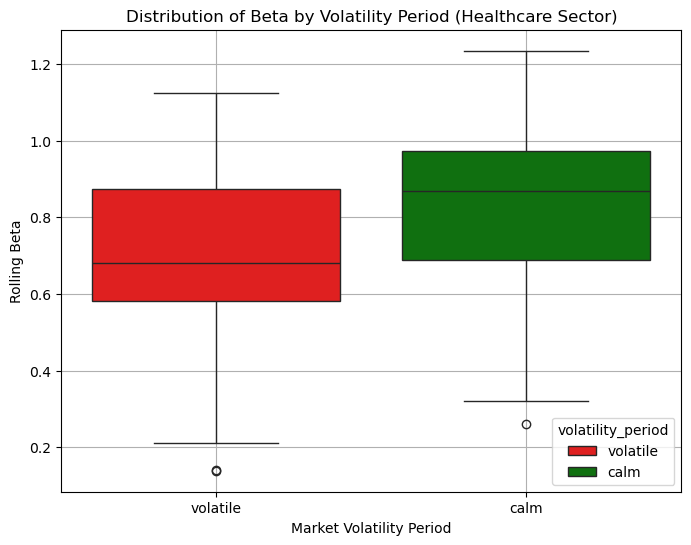

In [14]:
#Boxplot (XLU) - calm vs volatile

beta_df = pd.DataFrame({'beta': rolling_beta, 'volatility_period': returns['volatility_period']})
beta_df.dropna()

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=beta_df, x = 'volatility_period', y='beta', hue='volatility_period', palette={ 'calm': 'green', 'volatile': 'red'})
plt.title('Distribution of Beta by Volatility Period (Utility Sector)')
plt.ylabel('Rolling Beta')
plt.xlabel('Market Volatility Period')
plt.grid(True)
plt.show()

#Boxplot (XLV) - calm vs volatile

beta_df = pd.DataFrame({'beta': rolling_beta2, 'volatility_period': returns['volatility_period']})
beta_df.dropna()

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=beta_df, x = 'volatility_period', y='beta', hue='volatility_period', palette={ 'calm': 'green', 'volatile': 'red'})
plt.title('Distribution of Beta by Volatility Period (Healthcare Sector)')
plt.ylabel('Rolling Beta')
plt.xlabel('Market Volatility Period')
plt.grid(True)
plt.show()
           

[*********************100%***********************]  3 of 3 completed


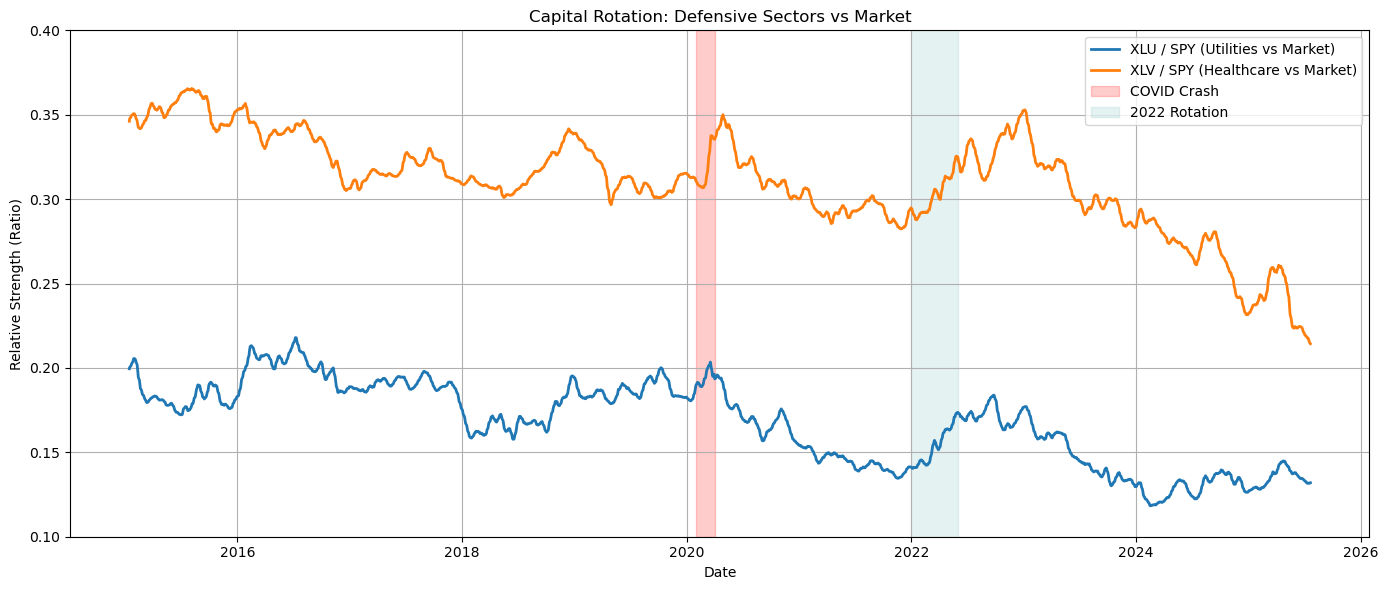

In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Load data
tickers = ['XLU', 'XLV', 'SPY']
data = yf.download(tickers, start='2015-01-01')['Close']

# Calculate ratios
xlu_spy = data['XLU'] / data['SPY']
xlv_spy = data['XLV'] / data['SPY']

# Optional: smooth with rolling average
xlu_spy_smooth = xlu_spy.rolling(window=10).mean()
xlv_spy_smooth = xlv_spy.rolling(window=10).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(xlu_spy_smooth, label='XLU / SPY (Utilities vs Market)', linewidth=2)
plt.plot(xlv_spy_smooth, label='XLV / SPY (Healthcare vs Market)', linewidth=2)
plt.axvspan('2020-02-01', '2020-04-01', color='red', alpha=0.2, label='COVID Crash')
plt.axvspan('2022-01-01', '2022-06-01', color='teal', alpha=0.1, label='2022 Rotation')
plt.title('Capital Rotation: Defensive Sectors vs Market')
plt.ylabel('Relative Strength (Ratio)')
plt.ylim(0.1, 0.4)
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



